**Data description:**
- Data is downloaded from [Quandl](https://www.quandl.com/data/WIKI-Wiki-EOD-Stock-Prices)

**Steps**:
In this kernel, the following steps are performed to analyze the stock price data in the period of 4 years from 2013-01-01 to 2016-12-31:

1. Load data
2. Observe the movement of single stock
3. Observe the interaction between changes of different stock prices
4. Get the optimal portfolio

The portfolio composes of 5 stocks: AAPL, AMZN, JPM, MSFT and TSLA 

In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

%matplotlib inline

In [2]:
from utils.visualization import *
from utils.indicators import *
from utils.loader import *

In [3]:
quandl.ApiConfig.api_key = 'o-yXuCnVqzcxKcUzc6vb'

In [4]:
if not os.path.exists('figures'):
    os.makedirs('figures')
if not os.path.exists('data'):
    os.makedirs('data')

# Load data

In [5]:
start = '2013-01-01'
end = '2016-12-31'

In [6]:
ticker_list = ['MSFT', 
               'AAPL',
               'TSLA',
               'JPM',
               'AMZN'
              ]

In [7]:
data = get_selected_data(ticker_list, start, end)

In [8]:
data.head()

,AAPL,AMZN,JPM,MSFT,TSLA
Date,,,,,
2013-01-02,71.777153,257.3100,39.829227,24.583819,35.36
2013-01-03,70.870627,258.4800,39.748962,24.254492,34.77
2013-01-04,68.897072,259.1500,40.453510,23.800555,34.40
2013-01-07,68.491795,268.4592,40.498102,23.756051,34.34
2013-01-08,68.676131,266.3800,40.578366,23.631441,33.68


In [9]:
data.shape

(1008, 5)

In [10]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
TSLA,0,0.0
MSFT,0,0.0
JPM,0,0.0
AMZN,0,0.0
AAPL,0,0.0


# Observe the movements

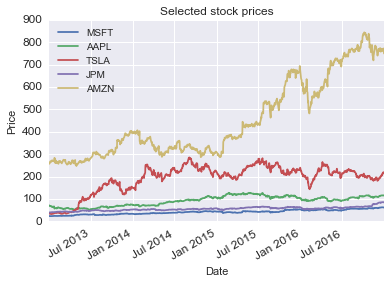

In [11]:
plot_selected(data, ticker_list, 0, data.shape[0], save_figure=True, file_name="figures/price_lot.png")

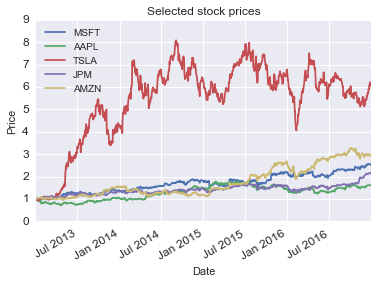

In [12]:
plot_selected(normalize_data(data), ticker_list, start, end, save_figure=True, file_name="figures/normalized_price_plot.png")

As can be seen from the two above figures, the TSLA and AMZN have higher return over the period than the remaining.

In [13]:
data.pct_change().tail()

,AAPL,AMZN,JPM,MSFT,TSLA
Date,,,,,
2016-12-23,0.001978,-0.007503,0.001841,-0.004878,0.023459
2016-12-27,0.006351,0.014213,0.000919,0.000633,0.029015
2016-12-28,-0.004264,0.000946,-0.007231,-0.004583,0.000957
2016-12-29,-0.000257,-0.009040,-0.007052,-0.001429,-0.023027
2016-12-30,-0.007796,-0.019970,0.004657,-0.011685,-0.004612


In [14]:
data.pct_change().describe()

,AAPL,AMZN,JPM,MSFT,TSLA
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000
mean,0.000597,0.001249,0.000845,0.001029,0.002275
std,0.015845,0.019384,0.013290,0.015036,0.031481
min,-0.123549,-0.109972,-0.069477,-0.113995,-0.145071
25%,-0.007143,-0.008132,-0.006004,-0.006322,-0.013171
50%,0.000442,0.000732,0.000911,0.000499,0.001172
75%,0.009272,0.011248,0.007944,0.008118,0.017003
max,0.081982,0.141311,0.083286,0.104522,0.244029


TSLA and AMZN also have high volatility

## AAPL

In [15]:
aapl = pd.DataFrame({'Price':data['AAPL'].values}, index = data.index)
aapl_full = get_data('AAPL', start, end)

In [16]:
#aapl.head()

In [17]:
#aapl_full.head()

In [18]:
#aapl_full['100ma']=  aapl_full['Adj_close'].rolling(window=100, min_periods=0).mean()

In [19]:
#plot_stock_data(aapl_full)

In [20]:
aapl = compute_rolling_mean(aapl, window = 50)
aapl = compute_rolling_std(aapl)
aapl = compute_bollinger_bands(aapl)
aapl = compute_momentum(aapl)
aapl = compute_rsi(aapl)
aapl = compute_william_percent_r(aapl)
aapl = compute_macd(aapl)
aapl = compute_daily_return(aapl)
aapl = compute_cumulative_return(aapl)
fill_missing_values(aapl)

In [21]:
aapl.head()

,Price,SMA_50,STD_30,SMA_30,Upper_band_30,Lower_band_30,Band_value_30,Momentum,RSI,Williams,MACD,Daily_return,Cum_daily_return
Date,,,,,,,,,,,,,
2013-01-02,71.777153,0.0,0.0,71.777153,215.331459,-71.777153,0.0,0.000000,35.285468,-70.131516,-0.179996,-0.012630,0.000000
2013-01-03,70.870627,0.0,0.0,70.870627,212.611881,-70.870627,0.0,-0.012630,35.285468,-70.131516,-0.179996,-0.012630,-0.012630
2013-01-04,68.897072,0.0,0.0,68.897072,206.691217,-68.897072,0.0,-0.027847,35.285468,-70.131516,-0.179996,-0.027847,-0.040125
2013-01-07,68.491795,0.0,0.0,68.491795,205.475386,-68.491795,0.0,-0.005882,35.285468,-70.131516,-0.179996,-0.005882,-0.045772
2013-01-08,68.676131,0.0,0.0,68.676131,206.028393,-68.676131,0.0,0.002691,35.285468,-70.131516,-0.179996,0.002691,-0.043203


In [22]:
aapl.shape

(1008, 13)

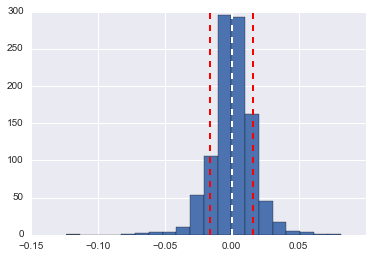

In [23]:
plot_hist(aapl, save_figure=True, file_name='figures/aapl_daily_return.png')

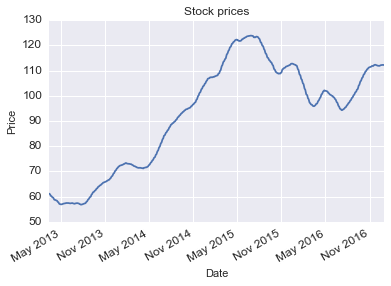

In [24]:
plot_data(aapl['SMA_50'][50:])

## AMZN

In [25]:
amzn = pd.DataFrame({'Price':data['AMZN'].values}, index = data.index)

In [26]:
amzn = compute_rolling_mean(amzn, window=50)
amzn = compute_rolling_std(amzn)
amzn = compute_bollinger_bands(amzn)
amzn = compute_momentum(amzn)
amzn = compute_rsi(amzn)
amzn = compute_william_percent_r(amzn)
amzn = compute_macd(amzn)
amzn = compute_daily_return(amzn)
amzn = compute_cumulative_return(amzn)
fill_missing_values(amzn)

In [27]:
amzn.shape

(1008, 13)

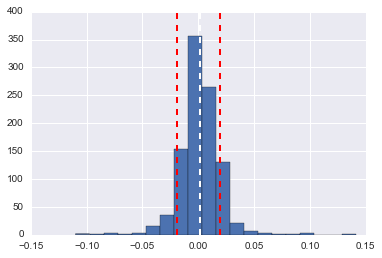

In [28]:
plot_hist(amzn, save_figure=True, file_name='figures/aapl_daily_return.png')

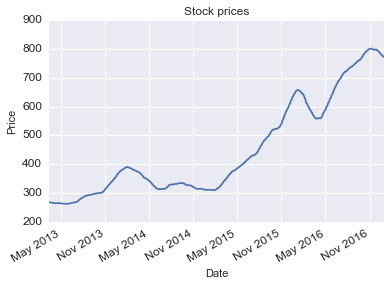

In [29]:
plot_data(amzn['SMA_50'][50:])

## JPM

In [30]:
jpm = pd.DataFrame({'Price':data['JPM'].values}, index = data.index)

In [31]:
jpm = compute_rolling_mean(jpm, window=50)
jpm = compute_rolling_std(jpm)
jpm = compute_bollinger_bands(jpm)
jpm = compute_momentum(jpm)
jpm = compute_rsi(jpm)
jpm = compute_william_percent_r(jpm)
jpm = compute_macd(jpm)
jpm = compute_daily_return(jpm)
jpm = compute_cumulative_return(jpm)
fill_missing_values(jpm)

In [32]:
jpm.shape

(1008, 13)

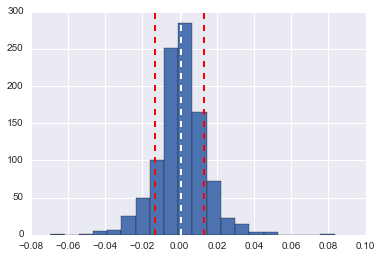

In [33]:
plot_hist(jpm, save_figure=True, file_name='figures/jpm_daily_return.png')

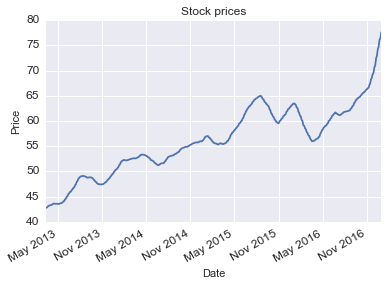

In [34]:
plot_data(jpm['SMA_50'][50:])

## MSFT

In [35]:
msft = pd.DataFrame({'Price':data['MSFT'].values}, index = data.index)

In [36]:
msft = compute_rolling_mean(msft, window=50)
msft = compute_rolling_std(msft)
msft = compute_bollinger_bands(msft)
msft = compute_momentum(msft)
msft = compute_rsi(msft)
msft = compute_william_percent_r(msft)
msft = compute_macd(msft)
msft = compute_daily_return(msft)
msft = compute_cumulative_return(msft)
fill_missing_values(msft)

In [37]:
#df.head()

In [38]:
msft.shape

(1008, 13)

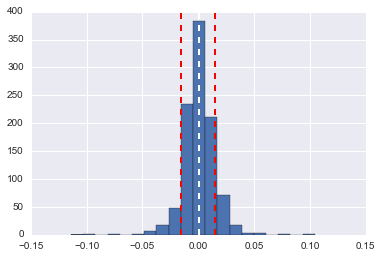

In [39]:
plot_hist(msft, save_figure=True, file_name='figures/msft_daily_return.png')

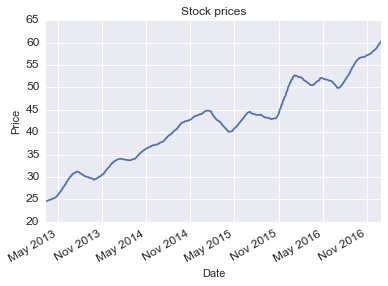

In [40]:
plot_data(msft['SMA_50'][50:])

## TSLA

In [41]:
tsla = pd.DataFrame({'Price':data['TSLA'].values}, index = data.index)

In [42]:
tsla = compute_rolling_mean(tsla, window=50)
tsla = compute_rolling_std(tsla)
tsla = compute_bollinger_bands(tsla)
tsla = compute_momentum(tsla)
tsla = compute_rsi(tsla)
tsla = compute_william_percent_r(tsla)
tsla = compute_macd(tsla)
tsla = compute_daily_return(tsla)
tsla = compute_cumulative_return(tsla)
fill_missing_values(tsla)

In [43]:
tsla.shape

(1008, 13)

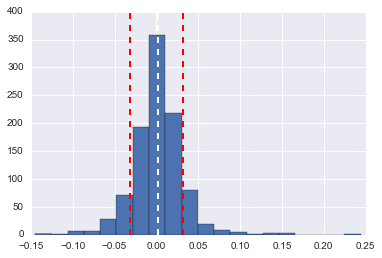

In [44]:
plot_hist(tsla, save_figure=True, file_name='figures/tsla_daily_return.png')

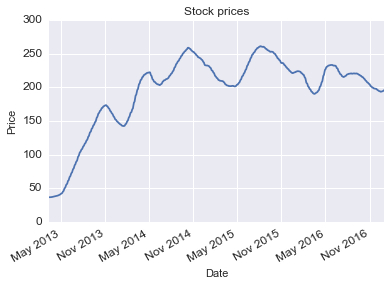

In [45]:
plot_data(tsla['SMA_50'][50:])

# Optimize portfolio

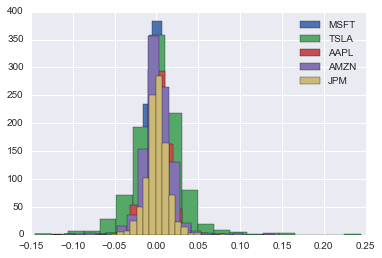

In [46]:
#Plot histograms at same chart
msft['Daily_return'].hist(bins=20, label='MSFT')
tsla['Daily_return'].hist(bins=20, label='TSLA')
aapl['Daily_return'].hist(bins=20, label='AAPL')
amzn['Daily_return'].hist(bins=20, label='AMZN')
jpm['Daily_return'].hist(bins=20, label='JPM')
plt.legend(loc='upper right')
plt.show()

Check the correlation between the changes of prices. From the heatmap, we can check the extend the change in a stock price is related with other stock prices

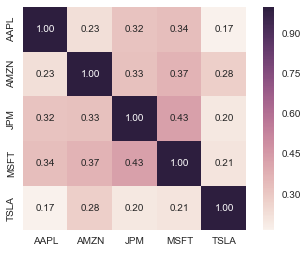

In [47]:
C = data.pct_change().corr()
hm = sns.heatmap(C, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10})
plt.savefig('figures/correlation.png')
plt.show()

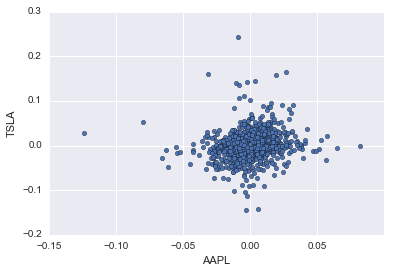

In [48]:
daily_return = pd.concat([aapl['Daily_return'].to_frame(name='AAPL'), tsla['Daily_return'].to_frame(name='TSLA')], axis=1)
daily_return.plot(kind='scatter', x='AAPL', y='TSLA')
plt.show()

In [49]:
daily_return = pd.concat([aapl['Daily_return'].to_frame(name='AAPL'),
                          amzn['Daily_return'].to_frame(name='AMZN'),
                          msft['Daily_return'].to_frame(name='MSFT'),
                          jpm['Daily_return'].to_frame(name='JPM'),
                          tsla['Daily_return'].to_frame(name='TSLA')], axis=1)

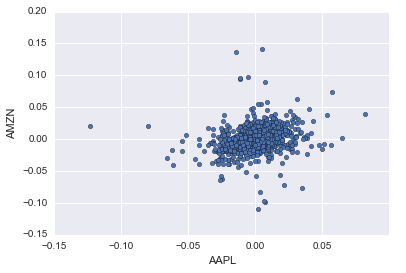

In [50]:
daily_return.plot(kind='scatter', x='AAPL', y='AMZN')
plt.show()

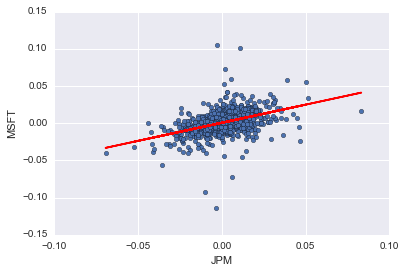

In [51]:
daily_return.plot(kind='scatter', x='JPM', y='MSFT')
beta_xom, alpha_xom = np.polyfit(daily_return['JPM'], daily_return['MSFT'], 1)
plt.plot(daily_return['JPM'], beta_xom*daily_return['JPM'] + alpha_xom, '-', color='r')
plt.savefig('figures/scatter_jpm_msft_fit.png')
plt.show()

In [52]:
norm_data = normalize_data(data)

In [53]:
norm_data.head()

,AAPL,AMZN,JPM,MSFT,TSLA
Date,,,,,
2013-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2013-01-03,0.987370,1.004547,0.997985,0.986604,0.983314
2013-01-04,0.959875,1.007151,1.015674,0.968139,0.972851
2013-01-07,0.954228,1.043330,1.016794,0.966329,0.971154
2013-01-08,0.956797,1.035249,1.018809,0.961260,0.952489


If we use the equal portion, the change of our portfolio is

In [54]:
portfolio = 0.2*norm_data.AAPL + 0.2*norm_data.AMZN + 0.2*norm_data.JPM + 0.2*norm_data.MSFT + 0.2*norm_data.TSLA
portfolio.pct_change().describe()

count    1007.000000
mean        0.001250
std         0.016956
min        -0.068411
25%        -0.007642
50%         0.001188
75%         0.010220
max         0.076583
dtype: float64

Now let's manipulate the portion to see how risk and reward move

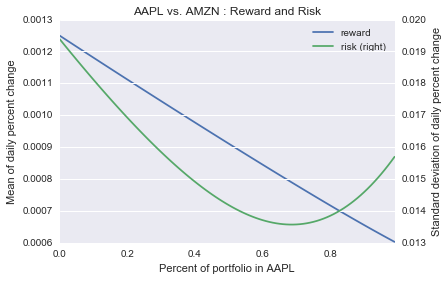

In [55]:
risk_reward_portfolio('AAPL', 'AMZN', norm_data, save_figure=True, file_name='figures/aapl_amzn_risk_reward.png')

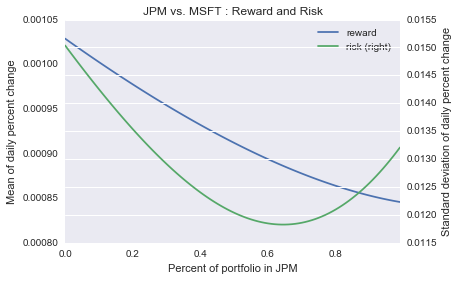

In [56]:
risk_reward_portfolio('JPM', 'MSFT', norm_data, save_figure=True, file_name='figures/jpm_msft_risk_reward.png')

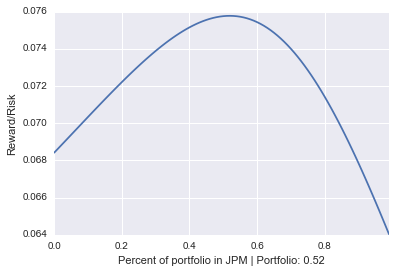

In [57]:
optimal_portfolio('JPM', 'MSFT', norm_data, save_figure=True, file_name='figures/jpm_msft_opt_port.png')

The portfolio of JPM and MSFT can be achived with 0.6:0.4. The portfolio (AAPL, AMZN, JPM, TSLA, MSFT) can be optimized to get the most stable portfolio by using regression.

# Save data

In [58]:
joined_price_data = data

In [59]:
with open("data/compiled_data.pkl", "wb") as f:
    pickle.dump(joined_price_data, f, protocol=-1)